In [ ]:
pwd

'/home/user/PycharmProjects/tmp/BERTAP_v2/src/models'

In [ ]:
cd ../../

/home/user/PycharmProjects/tmp/BERTAP_v2


/home/user/anaconda3/envs/jax/lib/python3.10/site-packages/IPython/core/magics/osm.py:417: UserWarning: using dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [ ]:
import pickle
import numpy as np
import jax, jax.numpy as jp
from src.common.configs import TotalConfigs, ModelConfig
from pathlib import Path

from src.models.vae import VQVAE
from src.scripts.vae_prepare import prepare_config_dataset
from src.scripts.batch_samplers import vae_batch_sampler
from src.utils.logging_utils import compare_recons
from src.utils.ant_viz import GoalReachingAnt

<frozen importlib._bootstrap>:283: DeprecationWarning: the load_module() method is deprecated and slated for removal in Python 3.12; use exec_module() instead
No module named 'flow'
No module named 'carla'
pybullet build time: Nov 28 2023 23:45:17


In [ ]:
#%%

render_env = GoalReachingAnt('antmaze-large-play-v2')

vae_path = Path.home() / "PycharmProjects/tmp/BERTAP_v2/save/BERTAP_VAE-0625-1317"
loader, configs = prepare_config_dataset('antmaze-large-play-v2', seq_len=64, latent_step=4, batch_size=4, n_epochs=10)

configs = TotalConfigs.load_from_txt(vae_path)
params = pickle.load((vae_path / "model_params.pkl").open("rb"))

batch_size = 4
denorm_keys = ('goals', 'observations', 'actions')
sample_batch_fn, (normalizer, splits) = vae_batch_sampler(loader, batch_size, normalize=True, hierarchical_goal=configs.data_config.hierarchical_goal)

eval_starts = np.arange(4) * loader.seq_len + 21 * 1000
eval_batch = sample_batch_fn(starts=eval_starts, pmap=False)

eval_batch_long = jax.tree.map(
    lambda x: jp.stack([jp.concatenate(x[:2], axis=0), jp.concatenate(x[2:], axis=0)], axis=0),
    eval_batch
)

/home/user/anaconda3/envs/jax/lib/python3.10/site-packages/gym/spaces/box.py:84: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(f"Box bound precision lowered by casting to {self.dtype}")


Target Goal:  (32.60346135203064, 24.571157742723663)
Target Goal:  (32.913682383863055, 24.975683014198626)
Loading dataset...


load datafile: 100%|██████████| 8/8 [00:01<00:00,  5.59it/s]


==== [Fixing terminal for AntMaze] ====


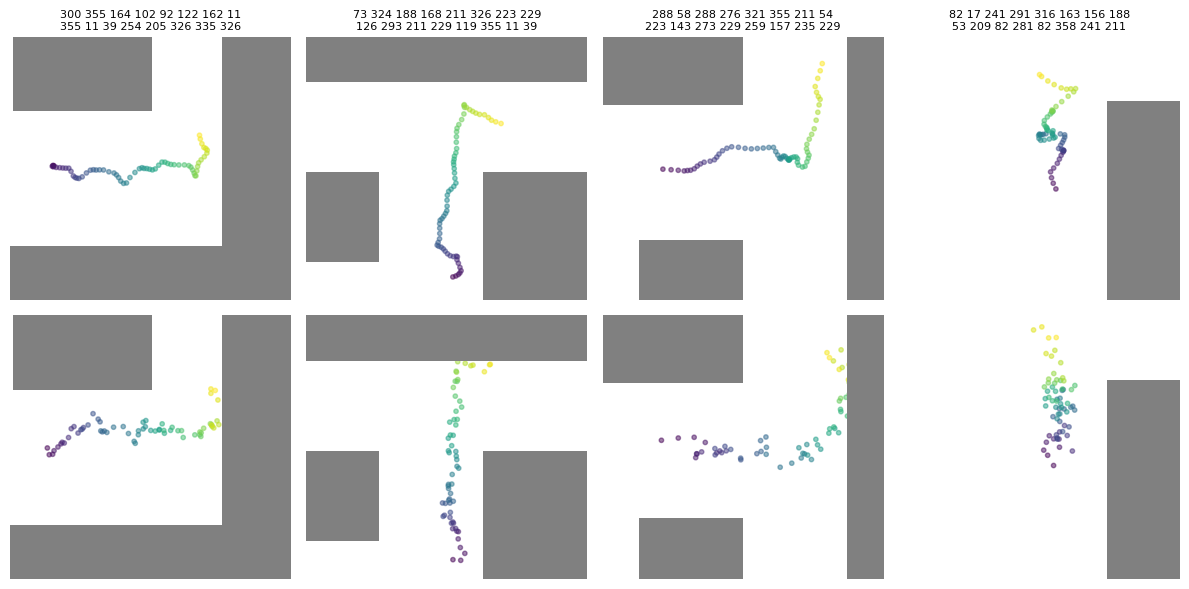

In [ ]:
#%%

model = VQVAE(configs.model_config)
recon, info = model.apply(params, **eval_batch, train=False)

compare_recons(None, render_env,
                normalizer.denormalize_concat(jax.device_get(eval_batch['traj_seq']), keys=denorm_keys, splits=splits),
                normalizer.denormalize_concat(jax.device_get(recon), keys=denorm_keys, splits=splits),
                goal_dim=configs.model_config.goal_dim,
                global_step=0,
                quantized=info['enc_vq']['indices'],
                goal_conditioned=configs.data_config.goal_conditioned,
                visualize=True)

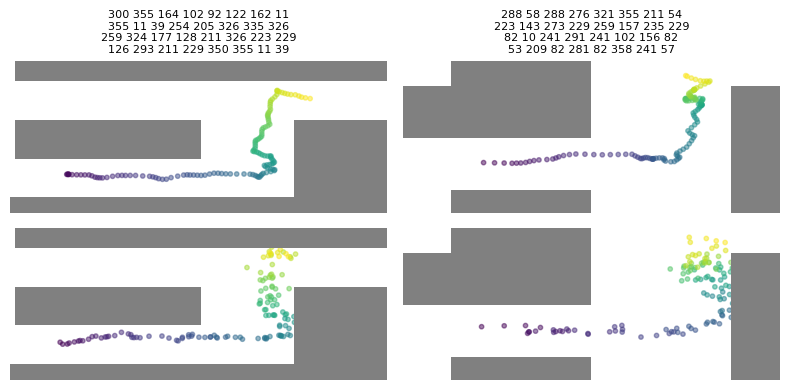

In [ ]:
#%%

recon_long, info = model.apply(params, **eval_batch_long, train=False)

compare_recons(None, render_env,
                    normalizer.denormalize_concat(jax.device_get(eval_batch_long['traj_seq']), keys=denorm_keys, splits=splits),
                    normalizer.denormalize_concat(jax.device_get(recon_long), keys=denorm_keys, splits=splits),
                    goal_dim=configs.model_config.goal_dim,
                    global_step=0,
                    quantized=info['enc_vq']['indices'],
                    goal_conditioned=configs.data_config.goal_conditioned,
                    visualize=True)

In [ ]:
#%%

render_env = GoalReachingAnt('antmaze-large-play-v2')

vae_path = Path.home() / "PycharmProjects/tmp/BERTAP_v2/save/BERTAP_VAE-0625-1317"
loader, configs = prepare_config_dataset('antmaze-large-play-v2', seq_len=96, latent_step=4, batch_size=4, n_epochs=10)

configs = TotalConfigs.load_from_txt(vae_path)
params = pickle.load((vae_path / "model_params.pkl").open("rb"))

batch_size = 4
denorm_keys = ('goals', 'observations', 'actions')
sample_batch_fn, (normalizer, splits) = vae_batch_sampler(loader, batch_size, normalize=True, hierarchical_goal=configs.data_config.hierarchical_goal)

eval_starts = np.arange(4) * loader.seq_len + 21 * 1000
eval_batch = sample_batch_fn(starts=eval_starts, pmap=False)

eval_batch_long = jax.tree.map(
    lambda x: jp.stack([jp.concatenate(x[:2], axis=0), jp.concatenate(x[2:], axis=0)], axis=0),
    eval_batch
)

/home/user/anaconda3/envs/jax/lib/python3.10/site-packages/gym/spaces/box.py:84: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(f"Box bound precision lowered by casting to {self.dtype}")


Target Goal:  (32.48600080087858, 25.1742301229012)
Target Goal:  (32.91071931320647, 24.069332193765906)
Loading dataset...


load datafile: 100%|██████████| 8/8 [00:01<00:00,  5.55it/s]


==== [Fixing terminal for AntMaze] ====


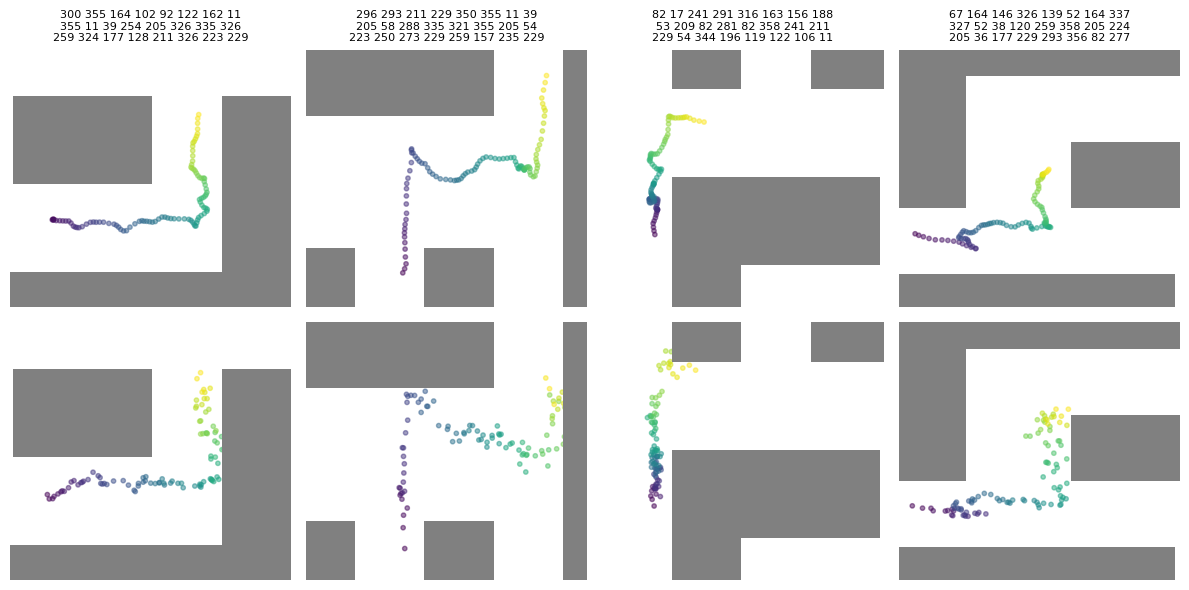

In [ ]:
#%%

model = VQVAE(configs.model_config)
recon, info = model.apply(params, **eval_batch, train=False)

compare_recons(None, render_env,
                normalizer.denormalize_concat(jax.device_get(eval_batch['traj_seq']), keys=denorm_keys, splits=splits),
                normalizer.denormalize_concat(jax.device_get(recon), keys=denorm_keys, splits=splits),
                goal_dim=configs.model_config.goal_dim,
                global_step=0,
                quantized=info['enc_vq']['indices'],
                goal_conditioned=configs.data_config.goal_conditioned,
                visualize=True)

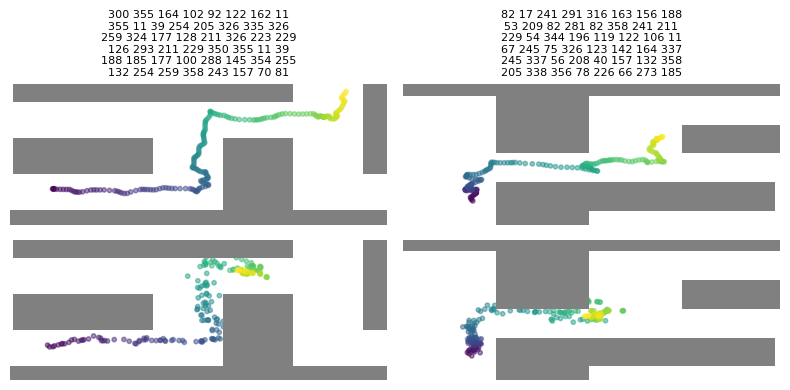

In [ ]:
#%%

recon_long, info = model.apply(params, **eval_batch_long, train=False)

compare_recons(None, render_env,
                    normalizer.denormalize_concat(jax.device_get(eval_batch_long['traj_seq']), keys=denorm_keys, splits=splits),
                    normalizer.denormalize_concat(jax.device_get(recon_long), keys=denorm_keys, splits=splits),
                    goal_dim=configs.model_config.goal_dim,
                    global_step=0,
                    quantized=info['enc_vq']['indices'],
                    goal_conditioned=configs.data_config.goal_conditioned,
                    visualize=True)

In [ ]:
#%%

render_env = GoalReachingAnt('antmaze-large-play-v2')

vae_path = Path.home() / "PycharmProjects/tmp/BERTAP_v2/save/BERTAP_VAE-0625-1317"
loader, configs = prepare_config_dataset('antmaze-large-play-v2', seq_len=96, latent_step=4, batch_size=4, n_epochs=10)

configs = TotalConfigs.load_from_txt(vae_path)
params = pickle.load((vae_path / "model_params.pkl").open("rb"))

batch_size = 4
denorm_keys = ('goals', 'observations', 'actions')
sample_batch_fn, (normalizer, splits) = vae_batch_sampler(loader, batch_size, normalize=True, hierarchical_goal=configs.data_config.hierarchical_goal)

eval_starts = np.arange(4) * loader.seq_len + 10 * 1000
eval_batch = sample_batch_fn(starts=eval_starts, pmap=False)

eval_batch_long = jax.tree.map(
    lambda x: jp.stack([jp.concatenate(x[:2], axis=0), jp.concatenate(x[2:], axis=0)], axis=0),
    eval_batch
)

/home/user/anaconda3/envs/jax/lib/python3.10/site-packages/gym/spaces/box.py:84: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(f"Box bound precision lowered by casting to {self.dtype}")


Target Goal:  (32.853743917456455, 24.83475590956018)
Target Goal:  (33.11409438286896, 25.453086268448594)
Loading dataset...


load datafile: 100%|██████████| 8/8 [00:01<00:00,  5.65it/s]


==== [Fixing terminal for AntMaze] ====


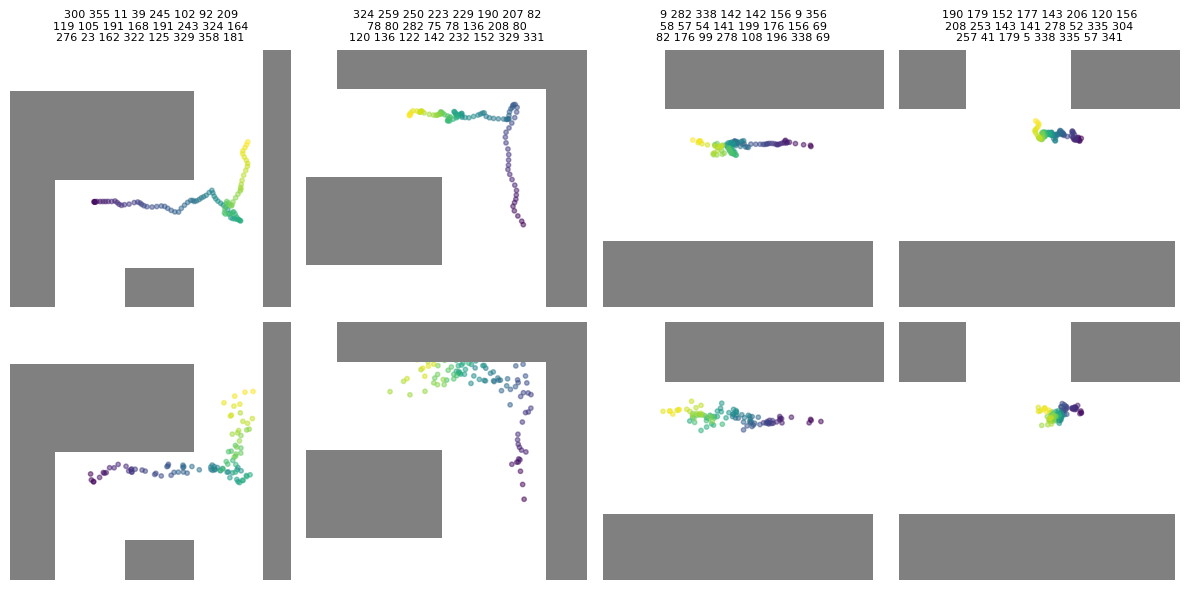

In [ ]:
#%%

model = VQVAE(configs.model_config)
recon, info = model.apply(params, **eval_batch, train=False)

compare_recons(None, render_env,
                normalizer.denormalize_concat(jax.device_get(eval_batch['traj_seq']), keys=denorm_keys, splits=splits),
                normalizer.denormalize_concat(jax.device_get(recon), keys=denorm_keys, splits=splits),
                goal_dim=configs.model_config.goal_dim,
                global_step=0,
                quantized=info['enc_vq']['indices'],
                goal_conditioned=configs.data_config.goal_conditioned,
                visualize=True)

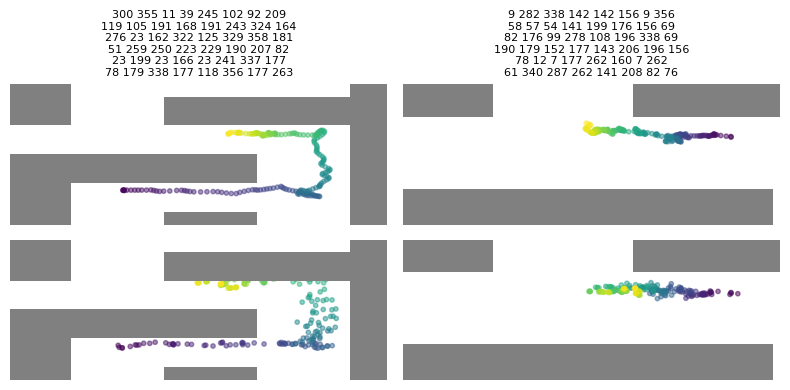

In [ ]:
#%%

recon_long, info = model.apply(params, **eval_batch_long, train=False)

compare_recons(None, render_env,
                    normalizer.denormalize_concat(jax.device_get(eval_batch_long['traj_seq']), keys=denorm_keys, splits=splits),
                    normalizer.denormalize_concat(jax.device_get(recon_long), keys=denorm_keys, splits=splits),
                    goal_dim=configs.model_config.goal_dim,
                    global_step=0,
                    quantized=info['enc_vq']['indices'],
                    goal_conditioned=configs.data_config.goal_conditioned,
                    visualize=True)